#Feedfoward  Neural  Network
Fully Connected Network
##Deep Learning (MNIST Classification) -  part #4


##Overfitting and Regularization
One question we haven't answered yet is what to do when a model is not performing well. This is very common for Deep Learning models. We train a model and the performance on the test set is disappointing.

This issue could be due to many reasons:

* too little data
* wrong architecture
* too little training
* wrong hyper-parameters

How do we approach debugging and improving a model?

This chapter is about a few techniques to do that. We will start by introducing **Learning Curves**, a tool that is useful to decide if more data is needed. Then we will present several **regularization** techniques, that may be useful to fight **Overfitting**. Some of these techniques have been invented very recently.

Finally, we will discuss **data augmentation**, which is useful in some cases, e.g., when the input data are images. We will conclude the notebook with a brief part on **hyperparameter optimization**. This is a vast topic, that can be approached in several ways.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# MNIST digit dataset
from tensorflow.keras.datasets import mnist
# split train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reescalonamento


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
X_train[1,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0
# não vamos utilizar o reshape pois usaremos a camada Flatten na entrada da rede
# X_train = X_train.reshape(-1, 28*28)
# X_test = X_test.reshape(-1, 28*28)

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential, backend
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten

# inicializa a sessão
backend.clear_session()
# inicialização do modelo
model = Sequential(name='Deep1')
# Camada de entrada
model.add(Input(shape=(28,28), name='input'))
# Flatten layer: 28x28 --> 784
model.add(Flatten())
# hidden layers
model.add(Dense(1024, activation='relu', name='first_dense'))
model.add(Dense(512, activation='relu', name='second_dense'))
model.add(Dense(256, activation='relu', name='third_dense'))
model.add(Dense(128, activation='relu', name='fourth_dense'))
# saída
model.add(Dense(10, activation='softmax', name='output_dense'))
# salva os pesos e bias com os valores inicias
initial_weights = model.get_weights()
model.summary()

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# optimizers
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop, Adadelta
# compilando o modelo da rede com learning_rating=0.05
model.compile(optimizer=SGD(0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# função para calcular o tempo de treinamento da rede
def processing_time(start_t, finish_t):
  tot_seg = finish_t - start_t
  t_min = tot_seg // 60
  t_seg = tot_seg % 60
  print("\nTempo de treinamento da rede:%2im%2is"% (t_min, t_seg))

In [10]:
import time
# início do treinamento da rede
start_time = time.process_time()
# carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
model.set_weights(initial_weights)
# treinamento da rede
h = model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)
# tempo total de treinamento da rede
processing_time(start_time, time.process_time())

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7949 - loss: 0.7167 - val_accuracy: 0.9587 - val_loss: 0.1499
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9550 - loss: 0.1520 - val_accuracy: 0.9697 - val_loss: 0.1098
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9698 - loss: 0.1023 - val_accuracy: 0.9757 - val_loss: 0.0819
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9797 - loss: 0.0677 - val_accuracy: 0.9760 - val_loss: 0.0830
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0510 - val_accuracy: 0.9782 - val_loss: 0.0685
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9894 - loss: 0.0371 - val_accuracy: 0.9802 - val_loss: 0.0698
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9925 - loss: 0.0261 - val_accuracy: 0.9803 - val_loss: 0.0677
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9955 - loss: 0.0183 - val_accuracy: 0.

In [11]:
def plot_acc_loss(h):

  plt.figure(figsize = (11,5))
  plt.subplot(1,2,1)
  plt.plot(h.history['loss'], label = 'Treino')
  plt.plot(h.history['val_loss'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Função Custo')
  plt.title('loss')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.grid()
  plt.subplot(1,2,2)
  plt.plot(h.history['accuracy'], label = 'Treino')
  plt.plot(h.history['val_accuracy'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Acurácia')
  plt.title('accuracy')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.tight_layout()
  plt.grid()
  plt.show()

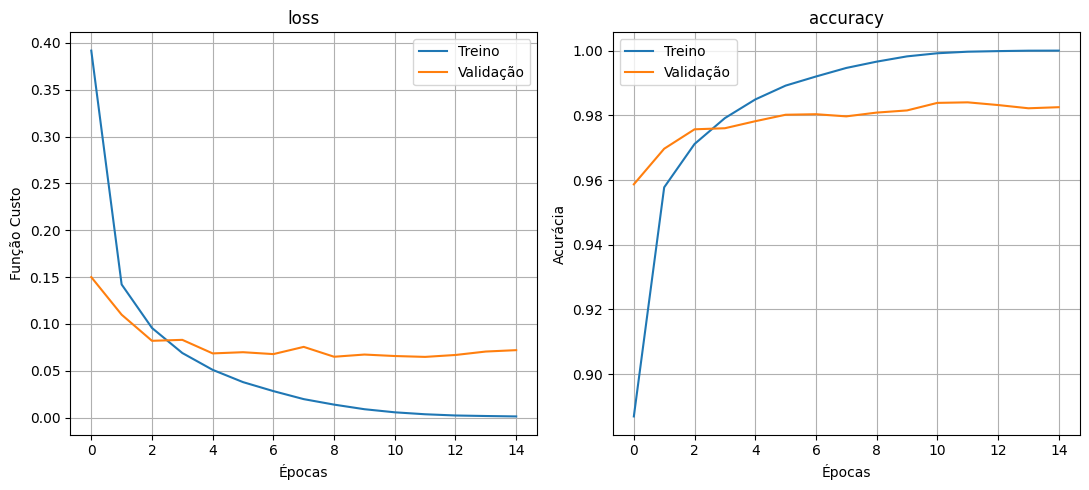

In [12]:
plot_acc_loss(h)

## Overfitting

Nota-se nos gráficos acima que obtém-se uma acurácia de ~100% para o dataset de treino e de ~98% nos dados de validação, o que sugere um *overfitting*, demostrando que a rede se tornou *especialista* no banco de dados de treinamento, não conseguindo o mesmo desempenho no banco de dados de validação e de teste.

Veremos abaixo as técnicas para prevenção e correção do overfitting.

In [13]:
# salvando o modelo (modelo, pesos e bias) para predições futuras sem ter que treiná-lo novamente
from keras.models import model_from_json
model_json = model.to_json()
with open("./model_1_deeplearning.json","w") as json_file: #/content/drive/MyDrive/
    json_file.write(model_json)
model.save_weights("./weights_1.weights.h5") #/content/drive/MyDrive/
print('Saved model to disk')

Saved model to disk


## Learning curves

The first tool we present is the [**Learning Curve**](https://en.wikipedia.org/wiki/Learning_curve). A learning curve plots the behavior of the training and validation scores as a function of how much training data we fed to the model.

The performance on the test set is lower than the performance on the training set, which indicates the model is _overfitting_.

> TIP: Overfitting is a fundamental concept in Machine Learning and Deep Learning.  

Before we start playing with different techniques to reduce overfitting, it is legitimate to ask if we don't have enough data to solve the problem.

_This is a very common situation_: you collect data with labels, you train a model, and the model does not perform as well as you hoped.

What should you do at that point? Should you collect more data? Alternatively, should you invest time in searching for better features or a different model?

With the little information we have, it is hard to know which of these alternatives is more likely to help. What is sure, on the other hand, is that all these alternatives carry a cost. For example, let's say you think that more data is what you need.

Collecting more labeled data could be as cheap and simple as downloading a new dataset from your source, or it could be as involved and complicated as coordinating with the data collection team at your company, hiring contractors to label the new data, and so on. In other words, the time and cost associated with new data collection strongly vary and need to be assessed case by case.

If, on the other hand, you decided to experiment with new features and model architectures, this could be as simple as adding a few layers and nodes to your model, or as complex as an R&D team dedicating several months to discovering new features for your particular dataset. Again, the actual cost of this option strongly depends on your specific use case.

Which of the two choices is more promising?

Do we need more data or a better model?

A learning curve is a tool we can use to answer that question. Here is how we build it.

First, we set the `X_test` aside, then, we take increasingly large fractions of `X_train` and use them to train the model. For each of these fractions, we fit the model. Then we evaluate the model on this fraction and the test set.
Since the training data is small, we expect the model to overfit the training data and perform quite poorly on the test set.

As we gradually take more training data, the model should improve and learn to generalize better, i.e., the test score should increase. We proceed like this until we have used all our training data.

At this point two cases are possible. If it looks like the test performance stopped increasing with the size of the training set, we probably reached the maximum performance of our model. In this case, we should invest time in looking for a better model to improve our performance.

In the second case, it would seem that the test error would continue to decrease if only we had access to more training data. If that's the case, we should probably go out looking for more labeled data first and then worry about changing model.

So, now you know how to answer the big question of more data or better model: _use a learning curve_.

Let's draw one together. First, we take increasing fractions of the training data using the function `np.linspace`.

> TIP: `np.linspace` returns evenly spaced numbers over a specified interval. In this case, we are creating four fractions, from 10% to 90% of the data.

In [14]:
fracs = np.linspace(0.1, 0.9, 5)
fracs

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [15]:
train_sizes = list((len(X_train) * fracs).astype(int))
train_sizes

[np.int64(6000),
 np.int64(18000),
 np.int64(30000),
 np.int64(42000),
 np.int64(54000)]

Then we loop over the train sizes, and for each `train_size` we do the following:

- take exactly `train_size` data from the `X_train`
- reset the model to the initial weights
- train the model using only the fraction of training data
- evaluate the model on the fraction of training data
- evaluate the model on the test data
- append both scores to arrays for plotting

Handling this in the first case (i.e., the first `train_size` in our `train_sizes` array), we'll use our work to then iterate over a long list of all the `train_sizes`.

Let's create some variables where we'll store our scores. Let's iterate over them and build up our `train_scores` and `test_scores` variables:

In [16]:
from sklearn.model_selection import train_test_split
train_scores = []
test_scores = []
start_time = time.process_time()

for train_size in train_sizes:
    inter_time = time.process_time()
    X_train_frac, _, y_train_frac, _ = train_test_split(X_train, y_train, train_size=train_size,
                     test_size=None, random_state=0, stratify=y_train)

    model.set_weights(initial_weights)
    h = model.fit(X_train_frac, y_train_frac, batch_size=64, epochs=15, verbose=0, validation_split=0.1)
    # Returns the loss value & metrics values for the model for X_train
    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    # save accuracy on list
    train_scores.append(r[-1])
    # Returns the loss value & metrics values for the model for X_test
    e = model.evaluate(X_test, y_test, verbose=0)
     # save accuracy on list
    test_scores.append(e[-1])
    print("Done size: ", train_size)

    training_time_s = time.process_time() - inter_time
    training_time_m = training_time_s / 60
    print("Tempo: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))

processing_time(start_time, time.process_time())

Done size:  6000
Tempo: 8.43 segundos (0.14 minutos)
Done size:  18000
Tempo: 16.00 segundos (0.27 minutos)
Done size:  30000
Tempo: 24.74 segundos (0.41 minutos)
Done size:  42000
Tempo: 33.20 segundos (0.55 minutos)
Done size:  54000
Tempo: 40.80 segundos (0.68 minutos)

Tempo de treinamento da rede: 2m 3s


Let's plot the training score and the test score as a function of increasing training size:

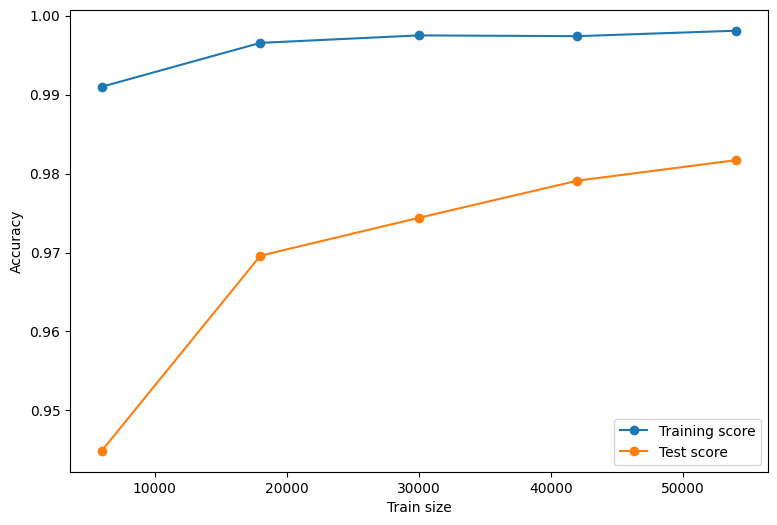

In [17]:
plt.figure(figsize = (9,6))
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Test score")
plt.legend(loc="best")
plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.show()

Judging from the curve, it appears the test score would keep improving if we added more data. This is the indication we were looking for. If on the other hand the test score was not improving, it would have been more promising to improve the model first and only then go look for more data if needed.

##What is overfitting?

It is a common pitfall in deep learning algorithms in which a model tries to fit the training data entirely and ends up memorizing the data patterns and the noise and random fluctuations. These models fail to generalize and perform well in the case of unseen data scenarios, defeating the model's purpose.

**When can overfitting occur?**

The high variance of the model performance is an indicator of an overfitting problem.

The training time of the model or its architectural complexity may cause the model to overfit. If the model trains for too long on the training data or is too complex, it learns the noise or irrelevant information within the dataset.

##Regularization Methods for Neural Networks
The simplest and perhaps most common regularization method is to add a penalty to the loss function in proportion to the size of the weights in the model.

1. **Weight Regularization** (weight decay): Penalize the model during training based on the magnitude of the weights.

Below is a list of five of the most common additional regularization methods.


1. **Activity Regularization**: Penalize the model during training base on the magnitude of the activations.
1. **Weight Constraint**: Constrain the magnitude of weights to be within a range or below a limit.
1. **Dropout**: Probabilistically remove inputs during training.
1. **Noise**: Add statistical noise to inputs during training.
1. **Early Stopping**: Monitor model performance on a validation set and stop training when performance degrades.


## Reducing Overfitting

Sometimes it's not easy to go out and look for more data. It could be time consuming and expensive. There are a few ways to improve a model and reduce its propensity to overfit without requiring additional data. These fall into the big family of **Regularization techniques**.

The general idea here is the following. By now you should understand that the complexity of a model is somewhat represented by the number of parameters the model has. In simple terms, a model with many layers and many nodes is more complex than a model with a single layer and few nodes. More complexity gives the model, more freedom to learn nuances in our training data. This is what makes Neural Networks so powerful.

On the other hand, the more freedom a model has, the more likely it will be to overfit on the training data, losing the ability to generalize. We could try to reduce the model freedom by reducing the model complexity, but this would not always be a great idea as it would make the model less able to pick up subtle patterns in our data.

A different approach would be to keep the model very complex, but change something else in the model to push it towards less complex solutions. In other words, instead of removing the complexity, we allow the model to choose complex solutions, but we drive the model towards simpler, more _regular_, solutions. Regularization refers to techniques to keep the complexity of a model from spinning out of control.

Let's review a few ways to regularize a model, and to ease our comparison we will define a few helper functions.

First, let's define a helper function to repeat the training several times. This helper function will be useful to average out any statistical fluctuations in the model behavior due to the random initialization of the weights. We will reset the backend at each iteration to save memory and erase any previous training.

### Model Regularization

[Regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics%29) is a common procedure in Machine Learning and it has been used to improve the performance of complex models with many parameters.

Remember the [Cost Function](https://en.wikipedia.org/wiki/Loss_function) we have introduced? The main goal of the cost function is to make sure that the predictions of the model are close to the correct labels.

Regularization works by modifying the original cost function $C$ with an additional term $\lambda C_r$, that somehow penalizes the complexity of the model:

\begin{equation}
C' = C + \lambda C_r
\end{equation}

The original cost function $C$ would decrease as the model predictions got closer and closer to the actual labels. In other words, the gradient descent algorithm for the original cost would push the parameters to the region of parameter space that would give the best predictions on the training data. In complex models with many parameters, this could result in overfitting because of all the freedom the model had.

The new penalty $C_r$ pushes the model to be "simple", in other words, it grows with the parameters of the model, but it is entirely unrelated to the goodness of the prediction.

The total cost $C'$ is a combination of the two terms, and therefore the model will have to try to generate the best predictions possible while retaining simplicity. In other words, the gradient descent algorithm is now solving a constrained minimization problem, where some regions of the parameter space are too expensive to use for a solution.

The hyper-parameter $\lambda$ determines the relative strength of the regularization, and we can set it.

But how do we implement $C_r$ in practice? There are several ways to do it. **Weight Regularization** assigns a penalty proportional to the size of the weights, for example:

The L1 regularization penalty is computed as: `loss = l1 * reduce_sum(abs(x))`
\begin{equation}
C_w(L1) = \sum_w |w|
\end{equation}
The L2 regularization penalty is computed as `loss = l2 * reduce_sum(square(x))`
\begin{equation}
C_w(L2) = \sum_w w^2
\end{equation}

The first one is called **L1-regularization** and it is the sum of the absolute values of each weight. The second one is called **L2-regularization** and it is the sum of the square values of each weight. While they both suppress complexity, their effect is different.

L1-regularization pushes most weights to be zero, except for a few that will be non-zero. In other words, the net effect of L1-regularization is to make the weight matrix _sparse_.

L2-regularization, on the other hand, suppresses weights quadratically, which means that any weight more significant than the others will give a much higher contribution to $C_r$ and therefore to the overall cost. The net effect of this is to make all weights equally small.

Similarly to weight regularization, **Bias Regularization** and **Activity Regularization** penalize the cost function with a term proportional to the size of the biases and the activations respectively.

Let's compare the behavior of our base model with a model with exact the same architecture but endowed with the `L2` weight regularization.

We start by defining a helper function that creates a model with weight regularization: we start from the function `base_model`, and we create the function `regularized_model`, adding the `kernel_regularizer` option to each layer. First of all let's import keras's `L1L2` regularizer function:

In [19]:
from tensorflow.keras.regularizers import L1L2
def regularized_model(l1=0.0001, l2=0.0001):
    """
    Return an l2-weight-regularized, fully connected
    model with 3 inner layers with 1024 nodes each
    and relu activation function.
    In this case, the default values used are l1=0.0001 and l2=0.0001.
    """
    #reg2=L1L2(l1=0.0005, l2=0.002)
    reg2=L1L2(l1, l2)
    backend.clear_session()
    model = Sequential(name='regularized_model')
    model.add(Input(shape=(28,28), name='input'))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_regularizer=reg2))
    model.add(Dense(512, activation='relu', kernel_regularizer=reg2))
    model.add(Dense(256, activation='relu', kernel_regularizer=reg2))
    model.add(Dense(128, activation='relu', kernel_regularizer=reg2))
    model.add(Dense(10, activation='softmax'))
    initial_weights_ = model.get_weights()
    model.compile(optimizer=SGD(0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model, initial_weights_

In [20]:
L2_model, initial_weights_L2 = regularized_model(l1=0.0002, l2=0.0002)

Model: "regularized_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
start_time = time.process_time()
# carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
L2_model.set_weights(initial_weights_L2)
# treinamento da rede
h = L2_model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)
# tempo total de treinamento da rede
processing_time(start_time, time.process_time())

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7875 - loss: 9.9867 - val_accuracy: 0.9523 - val_loss: 7.5221
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9455 - loss: 6.9751 - val_accuracy: 0.9615 - val_loss: 5.3592
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9571 - loss: 4.9136 - val_accuracy: 0.9183 - val_loss: 3.7626
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9609 - loss: 3.3072 - val_accuracy: 0.9662 - val_loss: 2.3690
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9605 - loss: 2.1400 - val_accuracy: 0.9725 - val_loss: 1.4898
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9581 - loss: 1.3755 - val_accuracy: 0.9625 - val_loss: 1.0074
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9615 - loss: 0.9265 - val_accuracy: 0.9663 - val_loss: 0.7407
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9642 - loss: 0.7023 - val_accuracy: 0.

Let's now compare the performance of the weight regularized model with our base model. We will also plot a dashed line at the maximum test accuracy obtained by the base model:

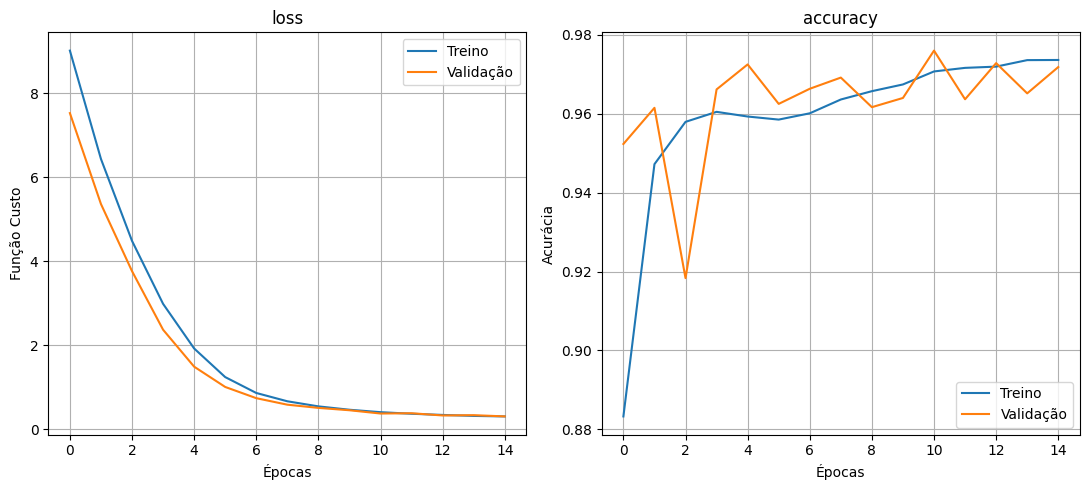

In [22]:
plot_acc_loss(h)

With this particular dataset, weight regularization does not seem to improve the model performance.

This is visually true at least within the small number of epochs we are running. It may be the case that if we let the training run much longer regularization would help, but we don't know for sure, and that can cost a lot of time and money.

It's however good to know that this technique exists and keep it in mind as one of the options to try. In practice, weight regularization has been replaced by more modern regularization techniques such as **Dropout** and **Batch Normalization**.

In [23]:
# salvando o Modelo para predições futuras sem ter que treiná-lo novamente
from keras.models import model_from_json
model_json = L2_model.to_json()
with open("./model_2_deeplearning.json","w") as json_file: #/content/drive/MyDrive/
    json_file.write(model_json)
L2_model.save_weights("./weights_2.weights.h5") #/content/drive/MyDrive/
print('Saved model to disk')

Saved model to disk


## Dropout

[Dropout](https://en.wikipedia.org/wiki/Dropout_(neural_networks%29) was introduced in 2014 by [Srivastava et al.](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf) at the University of Toronto to address the problem of overfitting in large networks. The key idea of Dropout is to randomly drop units (along with their connections) from the Neural Network during training.

In other words, during the training phase, each unit has a non-zero probability not to emit its output to the next layer. This prevents units from co-adapting too much.

Let's reflect on this for a second. It looks as if we are damaging the network by dropping a fraction of the units with non zero probability during training time. We are crippling the network and making it a lot harder for it to learn. This is counter-intuitive! Why are we weakening our model?

It turns out that the underlying principle is quite universal in Machine Learning: we make the network less stable so that the solution found during training is more general, more robust, and more resilient to failure. Another way to look at this is to say that we are adding noise at training time so that the network will need to learn more general patterns that are resistant to noise.

The technique has similarities with ensemble techniques, because it's as if, during training the network sampled from an many different “thinned” networks, where a few of the nodes are not working. At test time, dropout is turned off, and we use the full network. This technique has been shown to improve the performance of Neural Networks on Supervised Learning tasks in vision, speech recognition, document classification, and many others.

We strongly encourage you to read the [paper](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf) if you want to understand how dropout is implemented.

On the other hand, if you are eager to apply it, you'll be happy to hear that Dropout is implemented in Keras as a layer, so all we need to do is to add it between the layers.

##Dropout Regularization in Deep Learning

Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks. The term "dropout" refers to dropping out units (both hidden and visible) in a neural network.

A simple and powerful regularization technique for neural networks and deep learning models is dropout. This notebook will uncover the dropout regularization technique and how to apply it to deep learning models in Python with Keras.

###How the dropout regularization technique works.

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

As a neural network learns, neuron weights settle into their context within the network. Weights of neurons are tuned for specific features providing some specialization. Neighboring neurons become to rely on this specialization, which if taken too far can result in a fragile model too specialized to the training data. This reliant on context for a neuron during training is referred to complex co-adaptations.



<img src="https://editor.analyticsvidhya.com/uploads/112801.gif" alt="perceptron" width=800>

And then we define a `dropout_model`, again starting from the `base_model` and adding the dropout layers. We've tested several configurations, and we've found that with this dataset good results can be obtained with a dropout rate of 10% at the input and 50% in the inner layers. Feel free to experiment with different numbers and see what results you get.

>TIP: according to the [Documentation](https://keras.io/layers/core/#dropout), in the `Dropout` layer
the argument `rate` is a float between 0 and 1, that gives the fraction of the input units to drop.

In [24]:
def dropout_model():
    """
    Return a fully connected model
    with 4 hidden layers and relu activation function.
    Dropout can be applied by selecting the rate of dropout
    """
    backend.clear_session()
    model = Sequential(name='dropout_model')
    model.add(Input(shape=(28,28), name='input'))
    model.add(Flatten())
    model.add(Dropout(0.1))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    initial_weights_ = model.get_weights()
    model.compile(optimizer=SGD(0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model, initial_weights_

In [25]:
Dropout_model, initial_weights_dropout = dropout_model()

Model: "dropout_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
start_time = time.process_time()
# carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
Dropout_model.set_weights(initial_weights_dropout)
# treinamento da rede
h = Dropout_model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)
# tempo total de treinamento da rede
processing_time(start_time, time.process_time())

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6013 - loss: 1.1797 - val_accuracy: 0.9478 - val_loss: 0.1775
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9119 - loss: 0.3070 - val_accuracy: 0.9638 - val_loss: 0.1160
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9370 - loss: 0.2213 - val_accuracy: 0.9722 - val_loss: 0.0888
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9498 - loss: 0.1766 - val_accuracy: 0.9750 - val_loss: 0.0802
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9585 - loss: 0.1439 - val_accuracy: 0.9780 - val_loss: 0.0716
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9633 - loss: 0.1269 - val_accuracy: 0.9793 - val_loss: 0.0674
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9679 - loss: 0.1153 - val_accuracy: 0.9802 - val_loss: 0.0627
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9711 - loss: 0.1014 - val_accuracy: 0.

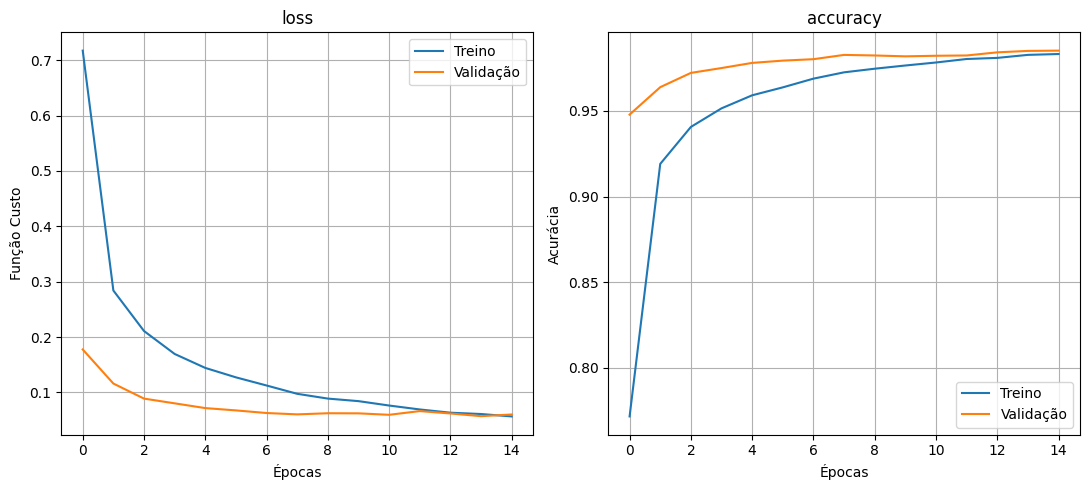

In [27]:
plot_acc_loss(h)

Nice! Adding Dropout to our model pushed our test score above the base model for the first time (although not by much)! This is great because we didn't have to add more data. Also, notice how the training score is lower than the test score, which indicates the model is not overfitting and also there seem to be even more room for improvement if we run the training for more epochs!

In [28]:
# salvando o Modelo para predições futuras sem ter que treiná-lo novamente
from keras.models import model_from_json
model_json = Dropout_model.to_json()
with open("./model_3_deeplearning.json","w") as json_file: #/content/drive/MyDrive/
    json_file.write(model_json)
Dropout_model.save_weights("./weights_3.weights.h5") #/content/drive/MyDrive/
print('Saved model to disk')

Saved model to disk


### Regularização

Uma  forma  de  evitar  o  *overfitting*  é  a  aplicação  de  regularização.  Um  tipo  de regularização comum às redes neurais é o *dropout*, que anula de forma aleatória, e a cada iteração, uma porcentagem dos neurônios, reduzindo, assim, a complexidade do modelo
e favorecendo a robustez do  mesmo, uma  vez que o treinamento se dá por morfologias distintas a cada iteração, evitando que certos neurônios se coadaptem ao aprendizado de neurônios anteriores.

Ao acrescentar camadas *dropout* após cada *hidden layer* com 10% a 50% dos neurônios ativos, obtém-se uma acurácia de  ~98%  e  ~98%  para os dados de treino  e  validação,  respectivamente.  A  ausência  de  *overfitting*  pode  ser  verificada, também, pelos gráficos da função custo e acurácia.

###Max Norm
The Dropout paper also mentions the use of a global constraint to improve the behavior of a Dropout network further. Constraints can be added in Keras through the `kernel_constraint` parameter available in the definition of a layer.
Following the paper, let's see what happens if we impose a `max_norm` constraint to the weights of the model. According to the [Documentation](https://keras.io/constraints/), this is equivalent to say that the sum of the square of the weights cannot be higher than a certain _constant_, which can be specified by the user with the argument `c`.

Let's define a new model function `dropout_max_norm`, that has both `dropout` and the `max_norm` constraint:

In [29]:
from tensorflow.keras.constraints import max_norm
def dropout_max_norm(c=2.0):
    """
    MaxNorm weight constraint. Constrains the weights incident to each hidden unit
    to have a norm less than or equal to a desired value.
    Args: max_value(c): the maximum norm value for the incoming weights (default c=2).
    Return a fully connected model with Dropout and Max Norm constraint.
    """
    backend.clear_session()
    model = Sequential(name='dropout_max_norm')
    model.add(Input(shape=(28,28), name='input'))
    model.add(Flatten())
    model.add(Dropout(0.1))
    model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(c)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=max_norm(c)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu', kernel_constraint=max_norm(c)))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu', kernel_constraint=max_norm(c)))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    initial_weights_ = model.get_weights()
    model.compile(optimizer=SGD(0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model, initial_weights_

In [30]:
max_norm_model, initial_weights_max_norm = dropout_max_norm(c=1)

Model: "dropout_max_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
start_time = time.process_time()
# carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
max_norm_model.set_weights(initial_weights_max_norm)
# treinamento da rede
h = max_norm_model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)
# tempo total de treinamento da rede
processing_time(start_time, time.process_time())

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5787 - loss: 1.2367 - val_accuracy: 0.9428 - val_loss: 0.1959
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9080 - loss: 0.3248 - val_accuracy: 0.9660 - val_loss: 0.1156
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9380 - loss: 0.2222 - val_accuracy: 0.9735 - val_loss: 0.0903
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9520 - loss: 0.1711 - val_accuracy: 0.9752 - val_loss: 0.0819
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9605 - loss: 0.1411 - val_accuracy: 0.9772 - val_loss: 0.0745
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9666 - loss: 0.1174 - val_accuracy: 0.9800 - val_loss: 0.0706
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9692 - loss: 0.1102 - val_accuracy: 0.9802 - val_loss: 0.0658
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9714 - loss: 0.0998 - val_accuracy: 0.

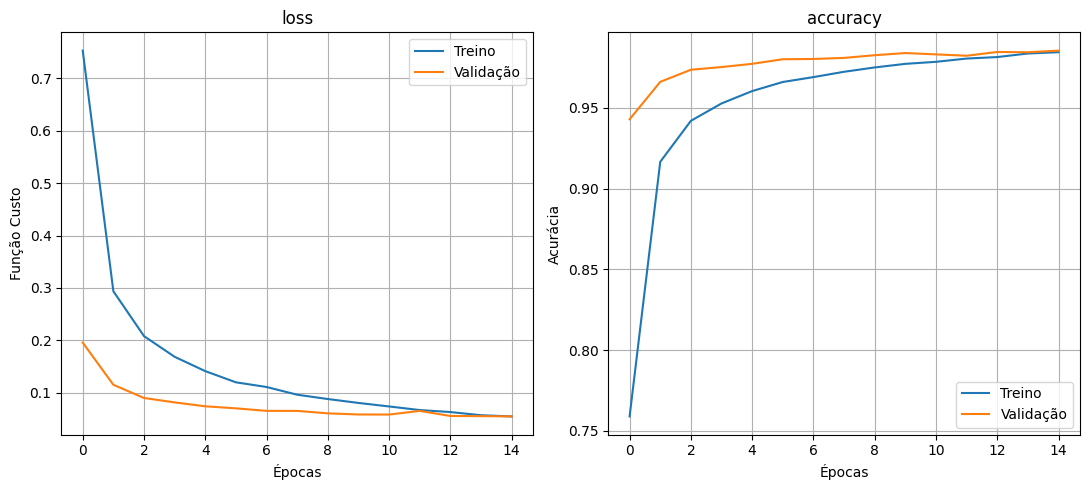

In [32]:
plot_acc_loss(h)

In this particular case, the Max Norm constraint does not seem to produce results that are qualitatively different from the simple Dropout, but there may be datasets where this constraint helps make the network converge to a better result.

In [33]:
# salvando o Modelo para predições futuras sem ter que treiná-lo novamente
from keras.models import model_from_json
model_json = max_norm_model.to_json()
with open("./model_4_deeplearning.json","w") as json_file: #/content/drive/MyDrive/
    json_file.write(model_json)
max_norm_model.save_weights("./weights_4.weights.h5") #/content/drive/MyDrive/
print('Saved model to disk')

Saved model to disk


### Batch Normalization

_Batch Normalization_ was introduced in 2015 as an even better regularization technique, as described in this [paper](https://arxiv.org/pdf/1502.03167.pdf). The authors of the paper started from the observation that training of deep Neural Networks is slow because the distribution of the inputs to a layer changes during training, as the parameters of the previous layers change. Since the inputs to a layer are the outputs of the previous layer, and these are determined by the parameters of the previous layer, as training proceeds the distribution of the output may drift, making it harder for the next layer to adapt.

The authors' solution to this problem is to introduce a normalization step between layers, that will take the output values for the current batch and normalize them by removing the mean and dividing by the standard deviation. They observe that their technique allows to use much higher learning rates and be less careful about initialization. It also acts as a regularizer, in some cases eliminating the need for Dropout.

Let's walk through the batch algorithm with a small code example. First we calculate the mean and standard deviation of the batch:
```python
mu_B = X_batch.mean()
std_B = X_batch.std()
```
Then we subtract the mean and divide by the standard deviation:
```python
X_batch_scaled = (X_batch - mu_B) / np.sqrt(std_B**2 + 0.0001)
```
Finally we rescale the batch with 2 parameters $\gamma$ and $\beta$ that are learned during training:
```python
X_batch_norm = gamma * X_batch_rescaled + beta
```
> TIP: Using math notation, the complete algorithm for Batch normalization is the following. Given a mini-batch $B = \{x_{1...m}\}$
>
\begin{align}
\mu_B &= \frac{1}{m} \sum_{i=1}^{m} x_i \\
\sigma_B &= \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2 \\
\hat{x_i} &= \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}} \\
y_i &= \gamma \hat{x_i} + \beta \\
\end{align}




Batch Normalization is very powerful, and Keras makes it available as a layer too, as described in the [Documentation](https://keras.io/layers/normalization/). One important thing to note is that BN needs to be applied before the nonlinear activation function. Let's see how it's done. First we load the `BatchNormalization` and `Activation` layers.

Then we define again a new model function `batch_norm_model` that adds Batch Normalization to our fully connected network defined in the `base_model`:

In [34]:
from tensorflow.keras.layers import BatchNormalization, Activation
def batch_norm_model(momentum_=0.99):
    """
    Batch normalization applies a transformation that maintains the mean output
    close to 0 and the output standard deviation close to 1.
    momentum_: Momentum for the moving average. Default: momentum_=0.99.
    Return a fully connected model with Batch Normalization.
    """
    backend.clear_session()
    model = Sequential(name='batch_norm_model')
    model.add(Input(shape=(28,28), name='input'))
    model.add(Flatten())
    model.add(Dense(1024))
    # batch normalization must come before activation function
    model.add(BatchNormalization(momentum=momentum_))
    model.add(Activation('relu'))
    model.add(Dense(512))
    model.add(BatchNormalization(momentum=momentum_))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(BatchNormalization(momentum=momentum_))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(BatchNormalization(momentum=momentum_))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(BatchNormalization(momentum=momentum_))
    model.add(Activation('softmax'))
    initial_weights_ = model.get_weights()
    model.compile(optimizer=SGD(0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model, initial_weights_

Batch Normalization seems to work better with smaller batches, so we will run the `repeat_train` function with a smaller `batch_size`.

Since smaller batches mean more weight updates at each epoch, we will also run the training for fewer epochs.

In [35]:
Batch_norm_model, initial_weights_batch_norm = batch_norm_model(0.8)

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

In [36]:
start_time = time.process_time()
# carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
Batch_norm_model.set_weights(initial_weights_batch_norm)
# treinamento da rede
h = Batch_norm_model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)
# tempo total de treinamento da rede
processing_time(start_time, time.process_time())

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8918 - loss: 0.5010 - val_accuracy: 0.9742 - val_loss: 0.1083
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9745 - loss: 0.1203 - val_accuracy: 0.9800 - val_loss: 0.0753
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9844 - loss: 0.0737 - val_accuracy: 0.9798 - val_loss: 0.0739
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9907 - loss: 0.0482 - val_accuracy: 0.9820 - val_loss: 0.0643
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9926 - loss: 0.0369 - val_accuracy: 0.9837 - val_loss: 0.0598
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9958 - loss: 0.0263 - val_accuracy: 0.9830 - val_loss: 0.0646
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9959 - loss: 0.0229 - val_accuracy: 0.9830 - val_loss: 0.0595
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9973 - loss: 0.0170 - val_accuracy: 0.

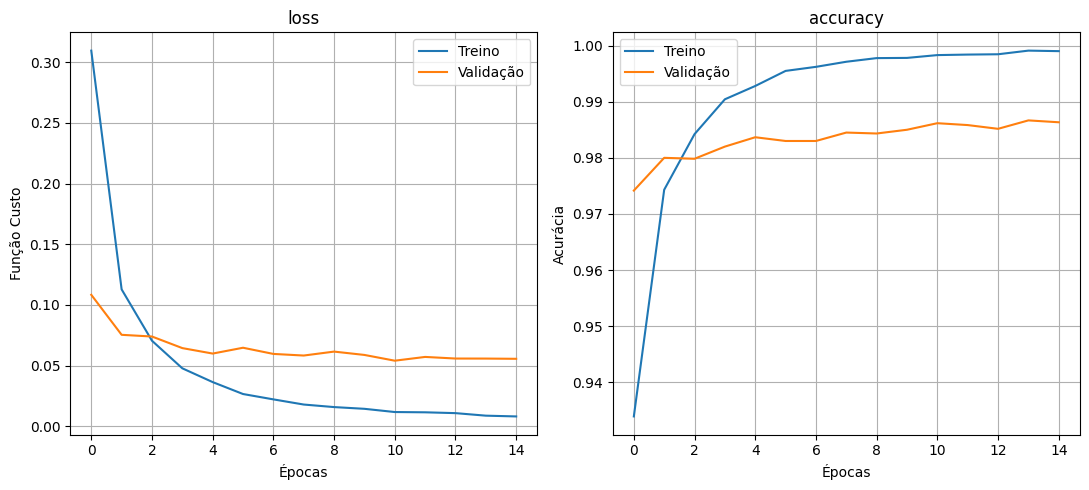

In [37]:
plot_acc_loss(h)

In this particular case, the Batch Norm does not seem to produce results that are qualitatively different from the simple net, but there may be datasets where this normalization helps make the network converge to a better result.

If we use Batch Norm with dropout maybe we have better results. It's worth a try!

In [38]:
# salvando o Modelo para predições futuras sem ter que treiná-lo novamente
from keras.models import model_from_json
model_json = Batch_norm_model.to_json()
with open("./model_5_deeplearning.json","w") as json_file: #/content/drive/MyDrive/
    json_file.write(model_json)
Batch_norm_model.save_weights("./weights_5.weights.h5") #/content/drive/MyDrive/
print('Saved model to disk')

Saved model to disk


#Exercícios
1. Para os exemplos de modelos vistos neste notebook, trabalhe inicialmente com o número de épocas e o batch size, de forma a tentar uma melhor performance da rede. Foque nos modelos mais promissores.
1. Utilizando os conhecimentos adquiridos nos trabalhos anteriores, faça testes com outros otimizadores com diferentes learning rates, para tentar uma melhor sintonia das redes mais promissoras.
1. Elabore gráficos e/ou tabelas com dados comparativos, mostrando o desempenho das redes selecionadas com os diferentes hiper-parâmetros escolhidos.
1. Salve os melhores modelos de rede para se fazer as predições futuras, que serão utilizadas no notebook *Deep Learning #5*.
1. Faça um teste nos modelos projetados acima com o banco de dados de dígitos que você criou. Quais modelos obtiveram melhores performance?

# Referências

[1] http://neuralnetworksanddeeplearning.com/chap1.html

[2] https://medium.com/turing-talks/turing-talks-19-modelos-de-predi%C3%A7%C3%A3o-redes-neurais-1f165583a927

[3] https://www.tutorialspoint.com/artificial_neural_network/index.htm

[4] https://matheusfacure.github.io/2017/03/05/ann-intro/

[5] https://matheusfacure.github.io/2017/05/15/deep-ff-ann/

[6] https://www.simplilearn.com/tutorials/deep-learning-tutorial

[7] https://www.datacamp.com/tutorial/tutorial-deep-learning-tutorial

[8] https://www.kaggle.com/learn/intro-to-deep-learning

# Respostas

In [58]:
def show_predict(examples, targets, predict_):
    init = 0
    plt.figure(figsize=(8, 8))

    for i in range(64):
        if i == len(examples):
          break
        plt.subplot(8, 8, i+1)
        plt.imshow(examples[init + i], cmap='Greys')
        plt.xlabel(f'y: {targets[init + i]} - ŷ: {predict_[init + i]}', size = 9)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()

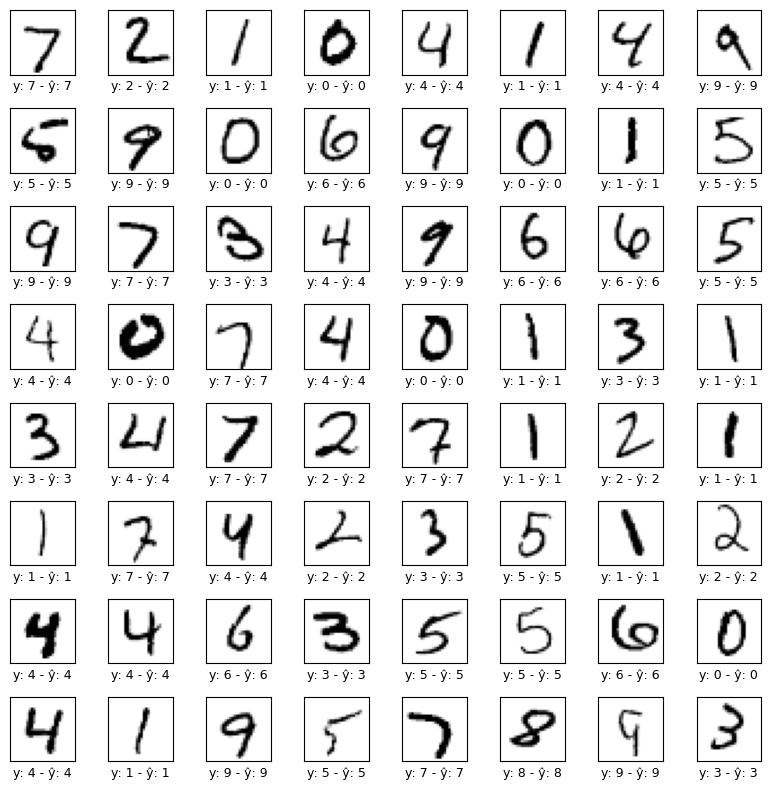

In [60]:

n_show = 100
show_predict(X_test[0:n_show], y_test[0:n_show], y_test[0:n_show])

In [ ]:
# 1) Para os exemplos de modelos vistos neste notebook, trabalhe inicialmente com o número de épocas e o batch size,
#    de forma a tentar uma melhor performance da rede. Foque nos modelos mais promissores.

models = [model, L2_model, Dropout_model, max_norm_model, Batch_norm_model]
iws    = [initial_weights, initial_weights_L2, initial_weights_dropout, initial_weights_max_norm, initial_weights_batch_norm]
h_ex1 = {}

bss = [32,64,128]
eps = [10,15,20]
for m, iw in zip(models, iws):
  for bs in bss:
    for ep in eps:
      start_time = time.process_time()
      k = m.name + '_' + str(ep) + '_' + str(bs)
      m.set_weights(iw)
      h_ex1[k] = m.fit(X_train, y_train, batch_size=bs, epochs=ep, verbose=1, validation_split=0.1)
      processing_time(start_time, time.process_time())



Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8346 - loss: 0.5597 - val_accuracy: 0.9620 - val_loss: 0.1256
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9652 - loss: 0.1139 - val_accuracy: 0.9745 - val_loss: 0.0816
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9805 - loss: 0.0621 - val_accuracy: 0.9778 - val_loss: 0.0748
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9867 - loss: 0.0430 - val_accuracy: 0.9770 - val_loss: 0.0724
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9911 - loss: 0.0285 - val_accuracy: 0.9802 - val_loss: 0.0673
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9940 - loss: 0.0217 - val_accuracy: 0.9827 - val_loss: 0.0611
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.9817 - val_loss: 0.0670
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9972 - loss: 0.0096 - 

In [ ]:
import pickle

with open('ex_1.pickle', 'wb') as handle:
    pickle.dump(h_ex1, handle)

with open('ex_1.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(h_ex1.values() == b.values())

In [ ]:
# best models

for k in h_ex1.keys():
  h_ex1[k].history['dif_acc_and_val_acc'] = (h_ex1[k].history['accuracy'][-1] / h_ex1[k].history['val_accuracy'][-1]) -1

threesold = 0.9995
h_ex1_aux = {}
#selecting the models above a threesold with the mininmu dif between train and test
for k in h_ex1.keys():
  if h_ex1[k].history['accuracy'][-1] >= threesold:
    h_ex1_aux[k] = h_ex1[k].history['dif_acc_and_val_acc']

h_ex1_sorted_by_values = dict(sorted(h_ex1_aux.items(), key=lambda item: item[1]))
print(h_ex1_sorted_by_values)
ex1_best_models = sorted(h_ex1_sorted_by_values, key=h_ex1_sorted_by_values.get, reverse=False)[:3]
ex1_best_models

In [ ]:
#recreate model creating function with optimizer and learning rate parameters (only for the top 3 selected models)
def recompile_model (m, lr, opt):

    m.compile(optimizer=opt(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    m.summary()
    return m



In [ ]:
# 2) Utilizando os conhecimentos adquiridos nos trabalhos anteriores, faça testes com outros otimizadores com diferentes learning rates,
# para tentar uma melhor sintonia das redes mais promissoras.

print(ex1_best_models)

opts = [SGD, Adam, Adagrad, RMSprop, Adadelta]
lrs = [0.01, 0.05,0.1, 0.2]
ex2_models    = {'batch_norm_model_20_64': {'iw': initial_weights_batch_norm, 'ep': 20, 'bs':64}
               ,            'Deep1_15_32': {'iw':  initial_weights , 'ep': 15, 'bs':32}
               ,            'Deep1_20_32': {'iw':  initial_weights , 'ep': 20, 'bs':32}
}


h_ex2 = {}

for m in ex2_models.keys():
   for  opt in opts:
    for lr in lrs:
      k = m + '_' + str(opt.__name__) + '_' + str(lr)

      nm = recompile_model(h_ex1[m].model, lr, opt)
      nm.set_weights( ex2_models[m]['iw'])

      start_time = time.process_time()
      h_ex2[k] = nm.fit(X_train, y_train, batch_size= ex2_models[m]['bs'], epochs=ex2_models[m]['ep'], verbose=1, validation_split=0.1)
      processing_time(start_time, time.process_time())



In [ ]:
import pickle

with open('ex_2.pickle', 'wb') as handle:
    pickle.dump(h_ex2, handle)

with open('ex_2.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(h_ex2.values() == b.values())

In [ ]:
for k in h_ex2.keys():
  h_ex2[k].history['dif_acc_and_val_acc'] = (h_ex2[k].history['accuracy'][-1] / h_ex2[k].history['val_accuracy'][-1]) -1

threesold = 0.9998
h_ex2_aux = {}
#selecting the models above a threesold with the mininmu dif between train and test
for k in h_ex2.keys():
  if h_ex2[k].history['accuracy'][-1] >= threesold:
    h_ex2_aux[k] = h_ex2[k].history['dif_acc_and_val_acc']

h_ex2_sorted_by_values = dict(sorted(h_ex2_aux.items(), key=lambda item: item[1]))
#print(h_ex2_sorted_by_values)
ex2_best_models = sorted(h_ex2_sorted_by_values, key=h_ex2_sorted_by_values.get, reverse=False)[:3]
ex2_best_models

In [ ]:
import pandas as pd

def compare_models_results(models_history_dict):

    results = []

    for model_name, history in models_history_dict.items():
        metrics = {}
        for key, values in history.history.items():

            if isinstance(values, (list, tuple)):  # Check if the value is iterable
                if 'accuracy' in key:  # Use max for accuracy metrics
                    metrics[key] = max(values)
                else:  # Use min for loss or similar metrics
                    metrics[key] = min(values)
            else:
                metrics[key] = values  # Directly assign if it's a single value
        metrics['model'] = model_name  # Add the model name to the row
        results.append(metrics)
    # Convert to a pandas DataFrame
    df = pd.DataFrame(results)
    df.set_index('model', inplace=True)  # Set the model name as the index

    return df

In [ ]:
# 3) Elabore gráficos e/ou tabelas com dados comparativos, mostrando o desempenho das redes selecionadas com os diferentes hiper-parâmetros escolhidos.

comparison_df = compare_models_results(h_ex2)
comparison_df



In [ ]:
# 4) Salve os melhores modelos de rede para se fazer as predições futuras, que serão utilizadas no notebook Deep Learning #5.

models_ex4 = {}
for m in ex2_best_models:
  models_ex4[m] = h_ex2[m].model


import pickle

with open('ex_4.pickle', 'wb') as handle:
    pickle.dump(models_ex4, handle)

with open('ex_4.pickle', 'rb') as handle:
    b = pickle.load(handle)



In [61]:
from PIL import Image
from numpy import asarray
import albumentations as A
import random
img = './digits/{d}.png'
i = 0

X_test_new = np.zeros((50, 28, 28))
X_test_flat_new = X_test_new.reshape(-1, 28*28)
X_test_sc_new = X_test_flat_new / 255
y_test_new = np.zeros((50))


def data_augmentation(data):
  image = np.array(data)
  random.seed(7)
  images = [data,
            A.VerticalFlip(p=1)(image=image)['image'],
            A.Rotate(-30)(image=image)['image'],
            A.Rotate(-95)(image=image)['image'],
            A.Rotate(70)(image=image)['image']

           ]
  return images

for d in range(10):
  image_file = img.replace("{d}", str(d))

  img1=Image.open(image_file)
  img1.thumbnail((28,28))
  img2=img1.convert(mode='L')
  img3=asarray(img2)
  img3 = 255 - img3
  img_to_import = data_augmentation(img3)
  for im in img_to_import:
    X_test_new[i] = im
    X_test_flat_new[i] = X_test_new[i].reshape(-1, 28*28)
    X_test_sc_new[i] = X_test_flat_new[i] / 255
    y_test_new[i] = d
    i += 1


# função para visualização das predições (examples: 28*28 pixels)
def show_predict_ex2(examples, targets, predict_):
    init = 0
    plt.figure(figsize=(10, 10))

    for i in range(49):
        plt.subplot(8, 8, i+1)
        plt.imshow(examples[init + i], cmap='Greys')
        plt.xlabel(f'y: {targets[init + i]} - ŷ: {predict_[init + i]}', size = 9)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
# 5) Faça um teste nos modelos projetados acima com o banco de dados de dígitos que você criou. Quais modelos obtiveram melhores performance?
predictions = {}

for m in models_ex4.keys():
  print('**********************************************************************************************************************')
  print('Model Name:',m)
  print('**********************************************************************************************************************')
  predictions[m] = np.argmax(models_ex4[m].predict(X_test_new),axis=1)

  #prediction_new = my_model.predict(X_train_sc)
  #y_predict_new = np.argmax(prediction_new,axis=1)


  show_predict_ex2(X_test_new, y_test_new, predictions[m])
  print('**********************************************************************************************************************')